In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.TotalCharges = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df.drop('customerID', axis=1, inplace=True)

In [9]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No', value=0, inplace=True)

In [10]:
df_dum = pd.get_dummies(df)
df_dum.isna().sum()

SeniorCitizen                               0
tenure                                      0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
gender_Female                               0
gender_Male                                 0
Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
PhoneService_No                             0
PhoneService_Yes                            0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                

In [11]:
df_dum.dropna(inplace=True)

In [12]:
df_dum.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [13]:
class_0 = df_dum[df_dum['Churn'] == 0]
class_1 = df_dum[df_dum['Churn'] == 1]

In [14]:
len(class_0), len(class_1)

(5163, 1869)

In [15]:
class_1_over = class_1.sample(len(class_0), replace=True)
df_over = pd.concat([class_1_over, class_0], axis=0)

class_0_under = class_0.sample(len(class_1), replace=True)
df_under = pd.concat([class_0_under, class_1], axis=0)

df_original = df_dum

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [47]:
def make_data(df):
    
    X = df.drop(columns = ['Churn'])
    y = df['Churn'].values

    features = X.columns.values
    scaler = MinMaxScaler(feature_range = (0,1))
    scaler.fit(X)
    X = pd.DataFrame(scaler.transform(X))
    X.columns = features

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    return X_train, X_test, y_train, y_test

In [48]:
X_over_train, X_over_test, y_over_train, y_over_test = make_data(df_over)
X_under_train, X_under_test, y_under_train, y_under_test = make_data(df_under)
X_org_train, X_org_test, y_org_train, y_org_test = make_data(df_original)

In [57]:
def models(X_train, y_train, X_test, y_test):

    pred_lr = LogisticRegression().fit(X_train, y_train).predict(X_test)
    acc_lr = metrics.accuracy_score(y_test, pred_lr)

    pred_rf = RandomForestClassifier().fit(X_train, y_train).predict(X_test)
    acc_rf = metrics.accuracy_score(y_test, pred_rf)

    pred_knn = KNeighborsClassifier().fit(X_train, y_train).predict(X_test)
    acc_knn = metrics.accuracy_score(y_test, pred_knn)

    pred_svc = SVC().fit(X_train, y_train).predict(X_test)
    acc_svc = metrics.accuracy_score(y_test, pred_svc)

    return acc_lr, acc_rf, acc_knn, acc_svc

In [58]:
labels = ['Logistic Regression', 'Random Forest', 'KNN', 'SVC']

org_accs = []
for acc in models(X_org_train, y_org_train, X_org_test, y_org_test):
    org_accs.append(acc)

under_accs = []
for acc in models(X_under_train, y_under_train, X_under_test, y_under_test):
    under_accs.append(acc)

over_accs = []
for acc in models(X_over_train, y_over_train, X_over_test, y_over_test):
    over_accs.append(acc)

<Figure size 864x720 with 0 Axes>

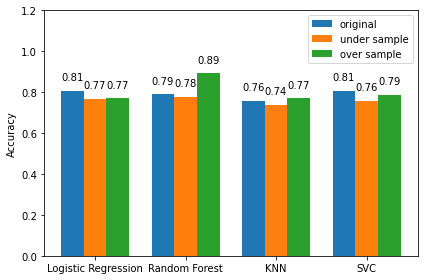

In [135]:
plt.figure(figsize=(12,10))

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
plt.bar(x - width, org_accs, width, label='original')
plt.bar(x, under_accs, width, label='under sample')
plt.bar(x + width, over_accs, width, label='over sample')

plt.ylim((0,1.2))
plt.ylabel('Accuracy')
plt.xticks(x, labels)
plt.legend()


for i in range(len(labels)):
    s = round(org_accs[i], 2)
    plt.text(i-1.5*width, s+0.05, s)

    s = round(under_accs[i], 2)
    plt.text(i-0.5*width, s+0.05, s)

    s = round(over_accs[i], 2)
    plt.text(i+0.5*width, s+0.05, s)


fig.tight_layout()